### Predicting Airline passenger satisfaction


#### Dataset ####
- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction )

In [4]:
import pandas as pd
df=pd.read_csv("dataset/airline.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [6]:
#Arrival Delay in minutes has some missing values and is of float data type.

In [7]:
df.sample(10)
#Arrival delay in minutes seems to contain no decimals and should therefore be converted into an int data type.

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
91206,83372,Female,Loyal Customer,33,Personal Travel,Eco,1124,3,5,3,...,2,3,5,5,3,4,2,0,0.0,neutral or dissatisfied
37001,19271,Female,disloyal Customer,23,Business travel,Eco,430,3,5,3,...,4,3,5,1,2,3,4,0,0.0,neutral or dissatisfied
124305,91588,Female,disloyal Customer,36,Business travel,Business,1340,3,3,3,...,5,4,2,5,4,5,5,32,44.0,neutral or dissatisfied
80438,76195,Female,Loyal Customer,36,Business travel,Business,2422,2,1,1,...,2,2,2,2,2,2,2,0,0.0,neutral or dissatisfied
2648,100988,Male,Loyal Customer,57,Business travel,Business,867,2,4,4,...,2,2,2,2,4,2,2,15,10.0,neutral or dissatisfied
100584,103419,Male,Loyal Customer,49,Personal Travel,Eco,237,3,4,3,...,4,4,2,4,4,4,4,0,0.0,neutral or dissatisfied
87561,4166,Male,Loyal Customer,50,Personal Travel,Eco,431,2,4,5,...,4,3,3,4,3,4,4,0,9.0,neutral or dissatisfied
88137,35185,Male,Loyal Customer,58,Business travel,Business,3147,3,3,3,...,4,4,5,4,4,4,4,30,57.0,satisfied
41457,11051,Female,Loyal Customer,34,Personal Travel,Eco,216,3,0,3,...,3,5,4,5,4,1,3,0,8.0,neutral or dissatisfied
104291,60943,Male,Loyal Customer,13,Business travel,Business,1529,5,5,3,...,4,4,4,5,3,5,4,0,0.0,satisfied


In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>,
        <Axes: title={'center': 'Inflight wifi service'}>],
       [<Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>,
        <Axes: title={'center': 'Food and drink'}>],
       [<Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>,
        <Axes: title={'center': 'On-board service'}>],
       [<Axes: title={'center': 'Leg room service'}>,
        <Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>,
        <Axes: title={'center': 'Inflight service'}>],
       [<Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Departure Delay in Minutes'}>,
        <Axes: title={'center': 

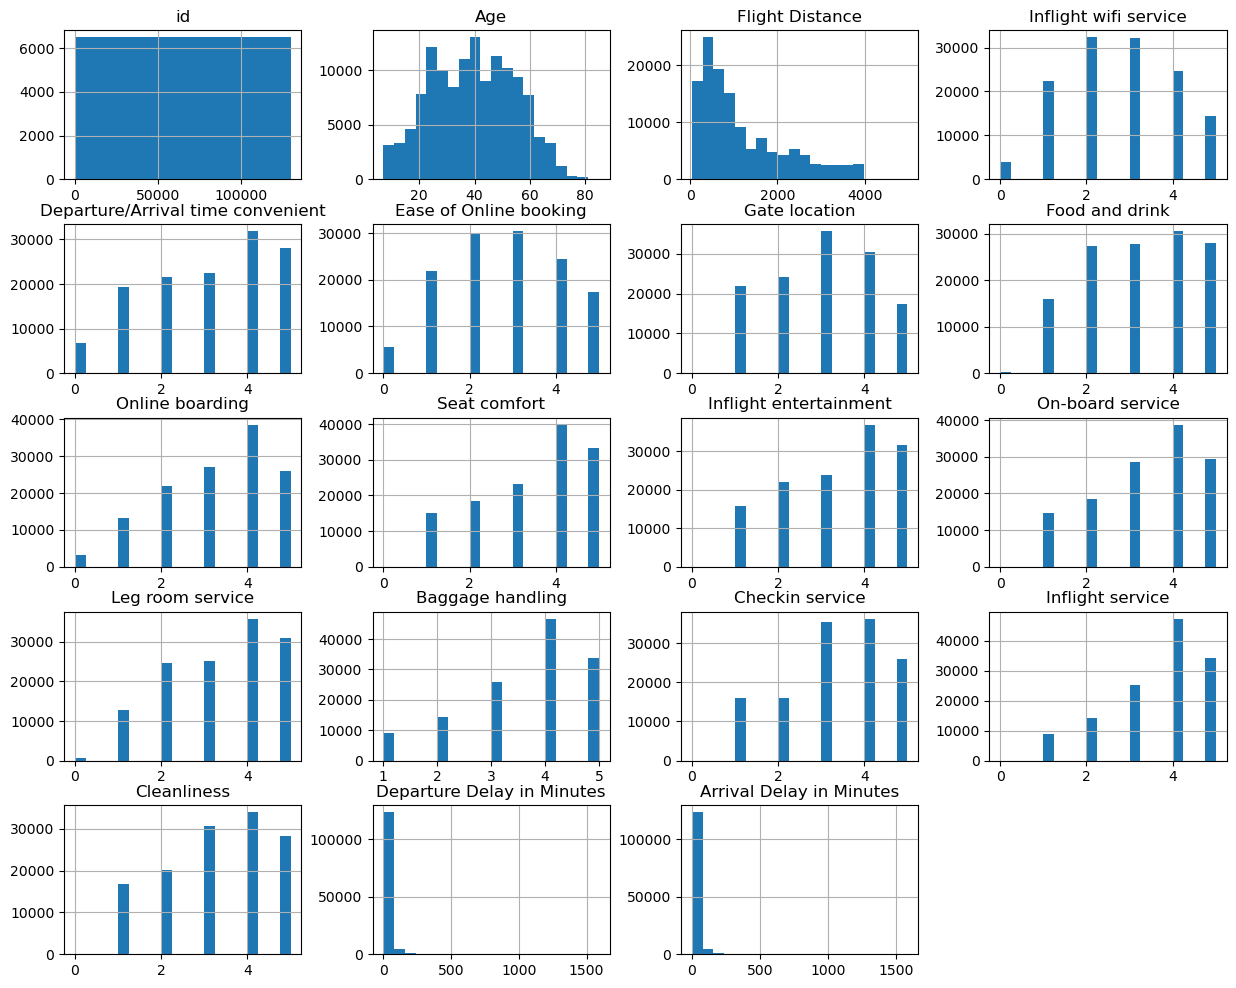

In [9]:
df.hist(bins=20, figsize=(15,12))

In [10]:
#departure delay in minutes and arrival delay in minutes have the same distribution.
#id feature should be dropped.
#Majority of the travellers are within the age range 20-40
# on board and inflight service have the same spread. #
# services have an almost similar distribution, can be merged into one single feature.

In [11]:
#checking for correlations.
corr_matrix= df.select_dtypes(include='number').corr()
corr_matrix


,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.020322,0.095504,-0.023096,-0.002192,0.013400,-0.000113,-0.000510,0.055538,0.052164,0.001620,0.055502,0.044088,0.074569,0.079325,0.078793,0.024048,-0.017643,-0.035657
Age,0.020322,1.000000,0.099459,0.016116,0.036960,0.022565,-0.000398,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565,-0.009041,-0.011248
Flight Distance,0.095504,0.099459,1.000000,0.006701,-0.018914,0.065165,0.005520,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648,0.002402,-0.001935
Inflight wifi service,-0.023096,0.016116,0.006701,1.000000,0.344915,0.714807,0.338573,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300,-0.015946,-0.017749
Departure/Arrival time convenient,-0.002192,0.036960,-0.018914,0.344915,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.000778,-0.000942
Ease of Online booking,0.013400,0.022565,0.065165,0.714807,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,-0.005318,-0.007033
Gate location,-0.000113,-0.000398,0.005520,0.338573,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.005973,0.005658
Food and drink,-0.000510,0.023194,0.057066,0.132214,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,-0.029164,-0.031715
Online boarding,0.055538,0.207572,0.214825,0.457445,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,-0.019404,-0.022730
Seat comfort,0.052164,0.159136,0.157662,0.121513,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,-0.027999,-0.030521


<Axes: >

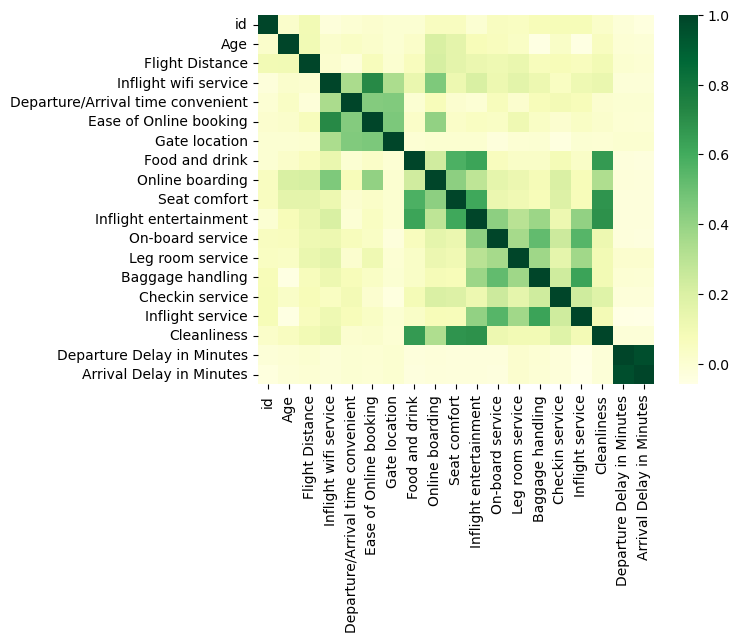

In [12]:
# since we have many features, it is easier to visualise the correlations on a graph.
import seaborn as sns
sns.heatmap(corr_matrix, cmap='YlGn')

In [13]:
# Arrival delay and departure delay are positively correlated.
# features related to physical comfort like seat comfort and leg room are also positively correlated.
#inflight wifi service and ease of online booking have a strong positive correlation.

In [14]:
# replacing the missing values with median
Arrival_delay_in_minutes_median= df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(Arrival_delay_in_minutes_median, inplace=True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_4420\1234309972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(Arrival_delay_in_minutes_median, inplace=True)


In [15]:
# Converting the Arrival Delay in Minutes to integer.
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)

In [16]:
df['Arrival Delay in Minutes'].sample(20)

114562    218
26269      31
59121       0
74936       7
63465      21
106952      7
68710       0
72116      37
3243       13
80684       0
1437        0
53651       0
100021      0
25094       0
11140      31
96044       0
27182      52
95315       0
124508      0
88408       0
Name: Arrival Delay in Minutes, dtype: int32

In [17]:
df.isnull().sum() # we now have no missing values.

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [18]:
df.duplicated()# we have no duplicates.

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool

In [19]:
# Feature engineering.
# combine the arrival delay in minutes and departure delay in minutes into one metric
df['total_delay']=df['Departure Delay in Minutes']+df['Arrival Delay in Minutes']

In [20]:
# Combine the services into one metric called service quality
df['Service Quality']=df[['Inflight wifi service','Food and drink','Seat comfort', 
                            'Leg room service', 'On-board service', 'Checkin service', 
                            'Inflight service', 'Cleanliness']].mean(axis=1)


In [21]:
df.sample(5)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,total_delay,Service Quality
28096,6200,Female,Loyal Customer,30,Personal Travel,Eco Plus,409,2,5,2,...,3,5,4,5,2,0,0,neutral or dissatisfied,0,3.125
8736,122695,Male,Loyal Customer,66,Personal Travel,Eco,361,2,4,2,...,3,5,5,4,4,0,0,neutral or dissatisfied,0,3.750
7231,54229,Female,Loyal Customer,25,Business travel,Eco,1222,5,4,4,...,2,5,2,5,5,34,11,satisfied,45,4.125
62703,11662,Female,Loyal Customer,14,Personal Travel,Eco Plus,878,5,3,5,...,4,2,3,3,3,5,0,satisfied,5,3.250
45636,112792,Female,Loyal Customer,49,Business travel,Business,3248,4,4,5,...,5,5,3,5,4,0,0,satisfied,0,4.250


In [22]:
corr_matrix= df.select_dtypes(include='number').corr()

<Axes: >

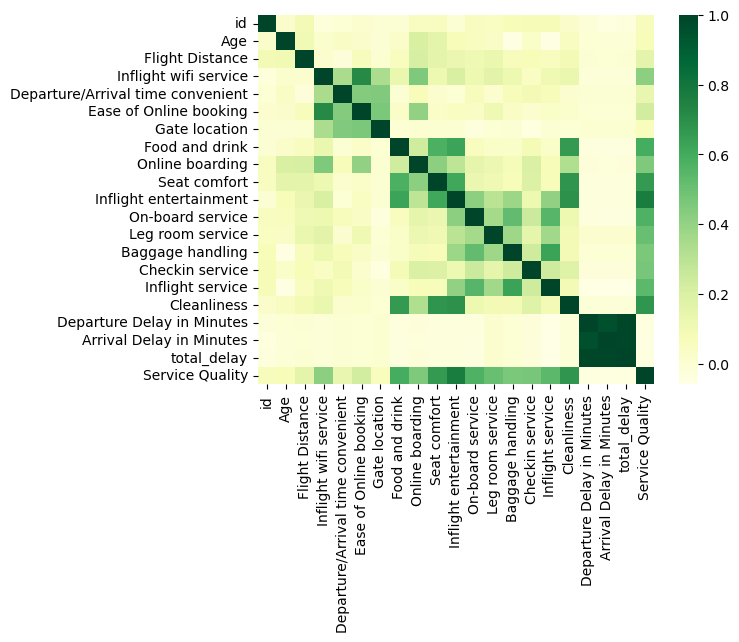

In [23]:
# check if the service quality and total delay create a stronger correlations.
import seaborn as sns
sns.heatmap(corr_matrix, cmap='YlGn')

In [24]:
# Drop the feature engineered features and id column  as well
df.drop(['Arrival Delay in Minutes','Departure Delay in Minutes','Inflight wifi service','Food and drink','Seat comfort', 
                            'Leg room service', 'On-board service', 'Checkin service', 
                            'Inflight service', 'Cleanliness','id'], inplace=True, axis =1 )

In [25]:
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Inflight entertainment,Baggage handling,satisfaction,total_delay,Service Quality
71266,Male,Loyal Customer,58,Business travel,Business,1979,1,3,1,4,5,5,satisfied,38,4.125
53819,Male,Loyal Customer,15,Personal Travel,Eco,776,4,3,1,3,1,4,neutral or dissatisfied,21,2.875
7029,Male,Loyal Customer,59,Personal Travel,Eco,177,5,3,3,3,2,2,neutral or dissatisfied,111,2.875
9138,Female,Loyal Customer,45,Personal Travel,Eco,859,5,1,4,5,2,2,neutral or dissatisfied,0,2.750
57520,Female,Loyal Customer,43,Business travel,Business,3785,3,3,3,4,1,3,neutral or dissatisfied,0,2.625


In [26]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [27]:
df['Class'].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [28]:
# using ordinal encoding, I will transform the satisfaction feature.
#passenger class as well should be ordinal encoding.
#this will make it easy to convert the rest of the remaining categorical features with one hot encoding.

In [29]:
from sklearn.preprocessing import OrdinalEncoder
satisfaction_order=['neutral or dissatisfied','satisfied']
class_order=['Business','Eco Plus','Eco']
sat_encoder=OrdinalEncoder(categories=[satisfaction_order],dtype='int64')
class_encoder=OrdinalEncoder(categories=[class_order], dtype='int64')
            
df['satisfaction_encoded']=sat_encoder.fit_transform(df[['satisfaction']])
df['class_encoded']=class_encoder.fit_transform(df[['Class']])

In [30]:
df.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Inflight entertainment,Baggage handling,satisfaction,total_delay,Service Quality,satisfaction_encoded,class_encoded
75158,Female,Loyal Customer,8,Personal Travel,Eco,96,5,1,4,1,5,4,neutral or dissatisfied,0,3.375,0,2
21742,Female,Loyal Customer,65,Business travel,Eco,257,5,4,4,3,5,5,satisfied,19,4.125,1,2
74677,Female,Loyal Customer,54,Business travel,Eco Plus,1039,5,5,5,4,3,3,neutral or dissatisfied,0,2.375,0,1
12500,Male,Loyal Customer,33,Business travel,Business,1747,2,2,2,4,4,4,satisfied,17,3.500,1,0
120333,Female,Loyal Customer,23,Business travel,Business,3872,4,4,4,3,2,4,neutral or dissatisfied,0,2.750,0,0


In [31]:
# we can now drop the satisfaction and class columns. 
df.drop(['satisfaction', 'Class'],inplace=True, axis=1)

In [32]:
#for the remaining columns i.e. Type of travel, customer type and gender, they require one hot encoding.
from sklearn.preprocessing import OneHotEncoder
columns_to_encode=['Gender','Customer Type','Type of Travel']
cat_encoder=OneHotEncoder(sparse_output= False, dtype='int64')
df_encoded=cat_encoder.fit_transform(df[columns_to_encode])

In [33]:
cat_encoder.get_feature_names_out()

array(['Gender_Female', 'Gender_Male', 'Customer Type_Loyal Customer',
       'Customer Type_disloyal Customer',
       'Type of Travel_Business travel', 'Type of Travel_Personal Travel'],
      dtype=object)

In [34]:
# Dropping the columns on the DF that have now been one-hot encoded.
df.drop(['Gender','Customer Type','Type of Travel'],inplace=True,axis=1)

In [35]:
# I will now create a df with only the encoded features then merge with the existing df.
encoded_df=pd.DataFrame(df_encoded, columns=cat_encoder.get_feature_names_out())

In [36]:
encoded_df.sample(10)

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
37741,0,1,1,0,1,0
112796,0,1,1,0,0,1
122725,0,1,1,0,0,1
55052,0,1,0,1,1,0
55187,0,1,1,0,1,0
73122,0,1,0,1,1,0
54474,0,1,0,1,1,0
123960,1,0,1,0,1,0
6685,0,1,1,0,1,0
10059,0,1,1,0,1,0


In [37]:
# Now to merge the two dataframes.
df_merged=pd.concat([df,encoded_df], axis=1)

In [38]:
#all my data is now transformed in the new df df_merged.
df_merged.sample(10)

,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Online boarding,Inflight entertainment,Baggage handling,total_delay,Service Quality,satisfaction_encoded,class_encoded,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
94676,43,2068,1,4,1,5,5,5,13,4.125,1,0,0,1,1,0,1,0
99672,42,746,4,4,4,4,3,4,6,3.250,1,0,0,1,0,1,1,0
81004,49,678,5,4,4,4,3,4,0,3.875,1,2,0,1,1,0,0,1
127136,45,588,5,5,5,4,2,2,0,3.875,1,0,1,0,1,0,1,0
4778,60,244,2,2,2,3,4,4,16,3.500,1,2,1,0,1,0,1,0
22386,76,2295,5,5,5,4,3,3,37,2.750,0,0,1,0,1,0,1,0
69500,53,2739,1,1,1,2,5,5,0,4.125,0,0,1,0,1,0,1,0
63764,52,3527,4,4,4,2,5,4,453,2.750,1,0,0,1,1,0,1,0
14891,41,972,2,2,2,5,4,2,0,4.000,1,2,0,1,1,0,1,0
75927,25,308,4,4,4,1,1,3,13,2.125,0,2,1,0,1,0,1,0


In [39]:
corr_satisfaction= df_merged.corr()

In [40]:
corr_satisfaction['satisfaction_encoded'].sort_values(ascending=False)

satisfaction_encoded                 1.000000
Service Quality                      0.511941
Online boarding                      0.501749
Type of Travel_Business travel       0.449861
Inflight entertainment               0.398234
Flight Distance                      0.298085
Baggage handling                     0.248680
Customer Type_Loyal Customer         0.186017
Ease of Online booking               0.168877
Age                                  0.134091
Gender_Male                          0.011236
Gate location                       -0.002793
Gender_Female                       -0.011236
Departure/Arrival time convenient   -0.054270
total_delay                         -0.055021
Customer Type_disloyal Customer     -0.186017
Type of Travel_Personal Travel      -0.449861
class_encoded                       -0.492947
Name: satisfaction_encoded, dtype: float64

In [41]:
#service quality and online boarding hava a strong positive correlation with satisfaction.
#reason for travel presents an interesting correlation , with those travelling for business having a positive correlation
#while those traveling for personal reasons having a strong negative correlation...literally the inversoe of each other.
#Gender, gate location, Departure/arrival time convenient, total_delay seem to have weak correlations.
# passenger class has a strong correlation .. perhaps passengers in higher classes tend to be more satisfied??

In [42]:
#Gender, id and gate location seem to not have an effect on customer satisfaction, will proceed to drop them.
#total delay and Departure/arrival time convenient may have a combined effect with other features , I will retain them for now.
df_merged.drop(['Gate location','Gender_Female','Gender_Male'],inplace=True, axis=1)

In [43]:
df_merged.sample(5)

,Age,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Online boarding,Inflight entertainment,Baggage handling,total_delay,Service Quality,satisfaction_encoded,class_encoded,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel
16145,32,3505,5,5,5,5,5,26,4.625,1,0,1,0,1,0
15963,11,1452,2,2,4,4,4,6,4.000,0,2,1,0,1,0
70706,53,2370,4,1,5,2,4,134,3.000,0,2,1,0,0,1
9740,25,907,3,3,3,3,3,1,2.875,0,2,0,1,1,0
61985,39,2684,2,4,4,4,4,0,3.500,1,0,1,0,1,0


In [45]:
#Time to prep our data for training.
# I will be using Random Forest as my classifier as such, there is no need to scale the data.
# splitting data using stratified shuffling with a test size of 0.2

from sklearn.model_selection import StratifiedShuffleSplit
splitter= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# I want to ensure a proper split especially for the satisfaction feature and class.
for train_index, test_index in splitter.split(df_merged, df_merged[
                                              ['satisfaction_encoded','class_encoded']]):
    strat_train=df_merged.loc[train_index]
    strat_test=df_merged.loc[test_index]


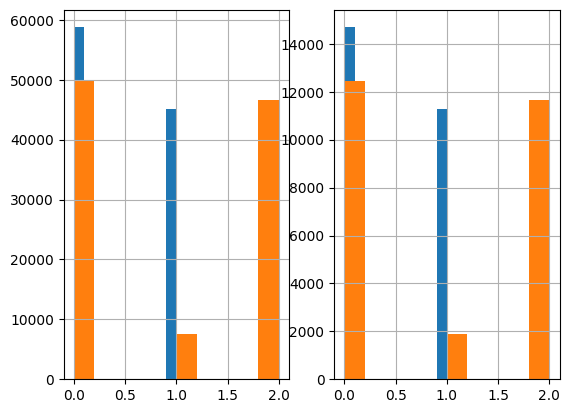

In [46]:
#check our distribution of the split
plt.subplot(1,2,1)
strat_train['satisfaction_encoded'].hist()
strat_train['class_encoded'].hist()

# test plots
plt.subplot (1,2,2)
strat_test['satisfaction_encoded'].hist()
strat_test['class_encoded'].hist()

plt.show()

In [47]:
# Splitting my train set into X and target variable (y)
X=strat_train.drop(['satisfaction_encoded'], axis=1)
y=strat_train['satisfaction_encoded']


In [48]:
# splitting the test data into X and y labels.
X_test=strat_test.drop(['satisfaction_encoded'], axis=1)
y_test=strat_test['satisfaction_encoded']

In [49]:
#train my data with random forest classifier.
# using grid seach to find the best hyperparameters.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score
rfc_clf= RandomForestClassifier()

rfc_clf.fit(X,y)
y_pred=rfc_clf.predict(X_test)

print("The accuracy score is : ", accuracy_score(y_test, y_pred))

The accuracy score is :  0.9303972898059747


In [50]:
#performing a grid search
param_grid=[
    {'n_estimators':[10,100,200,500], 
     'max_depth':[None,5,10],
     'min_samples_split':[2,3,4]}
]

grid_search=GridSearchCV(rfc_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [55]:
final_clf=grid_search.best_estimator_

In [56]:
final_clf

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [57]:
# using predict to get the predictions from the fined tuned metrics on our test data.
y_pred_grid=final_clf.predict(X_test)

In [58]:
#measuring accuracy by comparing the predictions from the classifier with the y_test labels.
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred_grid)
print(f'Test accuracy for the rfc is: {accuracy}')

Test accuracy for the rfc is: 0.9315906991068679


In [59]:
# our RandomForestClassifier has a slight improvement in the accuracy score after finetuning. 

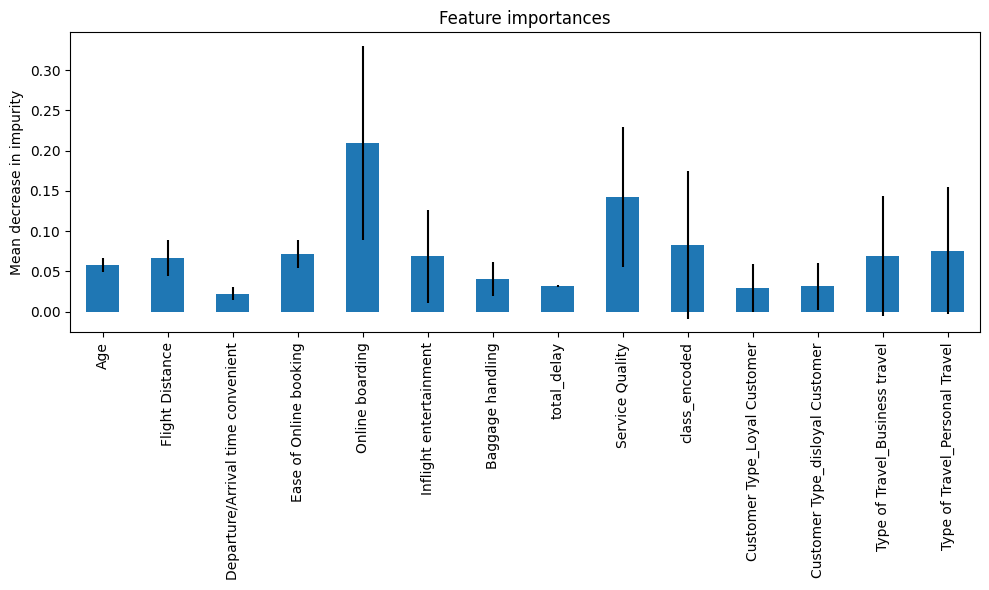

In [60]:
# analyzing the feature importances 
import numpy as np
importances=final_clf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)
std = np.std([tree.feature_importances_ for tree in final_clf.estimators_], axis=0)
# Configure the plot
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize=(10,6))
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
#online boarding and service quality rank highest.
#business and personal travel have an almost similar effect in feature importance.
#cutomer loyalty, departure/arrival time convenience and total delay are less influential.